# Introduction to Regression with Neural Networks in Tensorflow

Definition: Predicting a numerical varibale based on independent variables

In [60]:
# Import tensorflow
import tensorflow as tf
import pandas as pd

## Creating data to view and fit

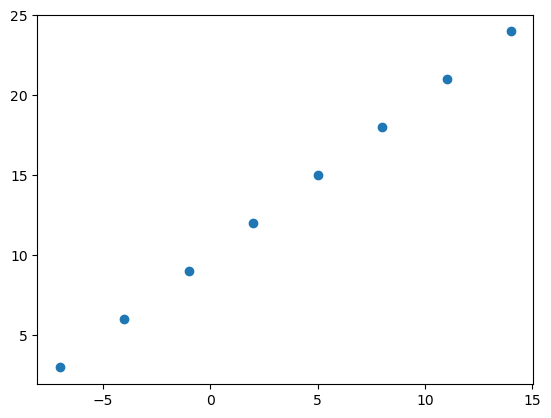

In [2]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#Visualisation
plt.scatter(X, y)

In [3]:
#Equation expected from the above data
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output shapes

In [4]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
input_shape = X.shape
output_shape = y.shape

input_shape, output_shape

((8,), (8,))

In [6]:
#Turn over numpy arrays into tensors
X = tf.cast(tf.constant(X), dtype= tf.float32)
y = tf.cast(tf.constant(y), dtype= tf.float32)

X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [7]:
X[0].shape, y[0].shape

(TensorShape([]), TensorShape([]))

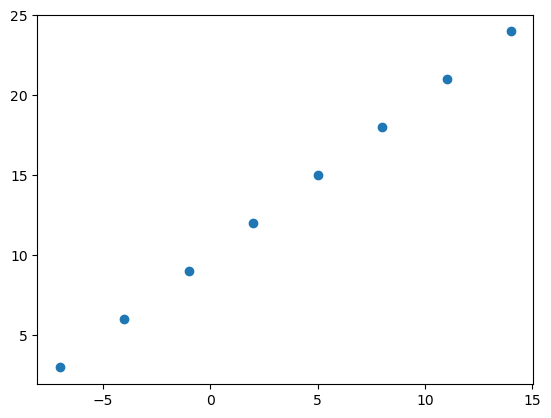

In [8]:
plt.scatter(X, y)

### Steps in modelling with Tensorflow

1. **Created a model**: define input, hidden and output layers
2. **Compile a model**: define the loss function, optimizer and the evaluation metrics
3. **Fitting a model**: train the model with the training dataset to find the pattern or relation between the independent variable and the dependent variable

In [9]:
# Set random sedd
tf.random.set_seed(42)

#1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#Alternative
""" model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1)) """

#2. Compile the model
model.compile(loss= tf.keras.losses.mae, 
              optimizer= tf.keras.optimizers.SGD(),
              metrics=['mae'])

#3. Fit the model
model.fit(tf.expand_dims(X, axis= -1), y, epochs= 5)

Epoch 1/5
1/1 [==============================] - 0s 107ms/step - loss: 17.2109 - mae: 17.2109
Epoch 2/5
1/1 [==============================] - 0s 2ms/step - loss: 16.9297 - mae: 16.9297
Epoch 3/5
1/1 [==============================] - 0s 2ms/step - loss: 16.6484 - mae: 16.6484
Epoch 4/5
1/1 [==============================] - 0s 2ms/step - loss: 16.3672 - mae: 16.3672
Epoch 5/5
1/1 [==============================] - 0s 2ms/step - loss: 16.0859 - mae: 16.0859


2024-01-22 14:33:51.107813: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [10]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
#Try and make a prediction using the model
ypred = model.predict([17.0])

ypred + 12.2284

1/1 [==============================] - 0s 37ms/step


array([[2.283534]], dtype=float32)

## Improving our model

We can imporve our model by altering the steps we took to create a model.

1. **Creating a model**: we might:
    1. add more **layers** 
    2. increase the **number of hidden units** within each of the hidden layers
    3. change the **activation function** of each layer.

2. **Compiling a model**: we might: 
    1. change the **optimization function** 
    2. perhaps the **learning rate** of the optimization function
3. **Fitting a model**: we might fit a model for:
    1. more **epochs** 
    2. more **data**


In [12]:
#Rebuild the model

#1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics= ['mae'])

#3. Fit the model
model.fit(tf.expand_dims(X, axis= -1), y, epochs= 100)

Epoch 1/100
1/1 [==============================] - 0s 94ms/step - loss: 18.4271 - mae: 18.4271
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 18.1459 - mae: 18.1459
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 17.8646 - mae: 17.8646
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 17.5834 - mae: 17.5834
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 17.3021 - mae: 17.3021
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 17.0209 - mae: 17.0209
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 16.7396 - mae: 16.7396
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 16.4584 - mae: 16.4584
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 16.1771 - mae: 16.1771
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 15.8959 - mae: 15.8959
Epoch 11/100
1/1 [==============================] - 0s 2ms

In [13]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [14]:
#Try predicting from model

model.predict([17.0])

1/1 [==============================] - 0s 25ms/step


array([[29.221935]], dtype=float32)

In [15]:
#1. Create Sequenial model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(lr= 0.01))

model.fit(tf.expand_dims(X, axis= -1), y, epochs= 100)

Epoch 1/100
1/1 [==============================] - 0s 102ms/step - loss: 17.5143
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 17.5083
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 17.5023
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 17.4963
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 17.4903
Epoch 6/100
1/1 [==============================] - 0s 1ms/step - loss: 17.4843
Epoch 7/100
1/1 [==============================] - 0s 1ms/step - loss: 17.4783
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 17.4723
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 17.4663
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 17.4603
Epoch 11/100
1/1 [==============================] - 0s 1ms/step - loss: 17.4543
Epoch 12/100
1/1 [==============================] - 0s 1ms/step - loss: 17.4483
Epoch 13/100
1/1 [=============================

In [16]:
#Predicting
model.predict([17.0])

1/1 [==============================] - 0s 31ms/step


array([[-13.627156]], dtype=float32)

In [17]:
#Another Change
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation= 'relu'),
    tf.keras.layers.Dense(1)
])

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics= ['mae'])

model.fit(tf.expand_dims(X, axis= -1), y, epochs= 100)

Epoch 1/100
1/1 [==============================] - 0s 114ms/step - loss: 13.9837 - mae: 13.9837
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 13.5295 - mae: 13.5295
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 13.0819 - mae: 13.0819
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 12.6369 - mae: 12.6369
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 12.1970 - mae: 12.1970
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 11.7552 - mae: 11.7552
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 11.3037 - mae: 11.3037
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 10.8423 - mae: 10.8423
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 10.3659 - mae: 10.3659
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 9.8649 - mae: 9.8649
Epoch 11/100
1/1 [==============================] - 0s 2ms/

In [18]:
model.predict([17.0])

1/1 [==============================] - 0s 34ms/step


array([[31.733578]], dtype=float32)

**Note**: In the above case, although the loss value is less but the prediction is way farther than the previous one which was much nearer to the actual value. Hence, this is a clear case of overfitting

In [19]:
#Another Change
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation= 'relu'),
    tf.keras.layers.Dense(1)
])

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics= ['mae'])

model.fit(tf.expand_dims(X, axis= -1), y, epochs= 100)

Epoch 1/100
1/1 [==============================] - 0s 109ms/step - loss: 11.2362 - mae: 11.2362
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 10.6961 - mae: 10.6961
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 10.2136 - mae: 10.2136
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 9.7237 - mae: 9.7237
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 9.2046 - mae: 9.2046
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 8.6514 - mae: 8.6514
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 8.0586 - mae: 8.0586
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 7.4253 - mae: 7.4253
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 6.7383 - mae: 6.7383
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 5.9909 - mae: 5.9909
Epoch 11/100
1/1 [==============================] - 0s 2ms/step - loss:

In [20]:
model.predict([17.0])

1/1 [==============================] - 0s 28ms/step


array([[31.284227]], dtype=float32)

In [21]:
#Another Change
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation= None),
    tf.keras.layers.Dense(1)
])

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics= ['mae'])

model.fit(tf.expand_dims(X, axis= -1), y, epochs= 100)

Epoch 1/100
1/1 [==============================] - 0s 123ms/step - loss: 13.6514 - mae: 13.6514
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 13.1334 - mae: 13.1334
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 12.6148 - mae: 12.6148
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 12.0930 - mae: 12.0930
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 11.5653 - mae: 11.5653
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 11.0289 - mae: 11.0289
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 10.4810 - mae: 10.4810
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 9.9190 - mae: 9.9190
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 9.3397 - mae: 9.3397
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 8.7404 - mae: 8.7404
Epoch 11/100
1/1 [==============================] - 0s 2ms/step

In [22]:
model.predict([17.0])

1/1 [==============================] - 0s 29ms/step


array([[29.101181]], dtype=float32)

In [23]:
#Another Change
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation= None),
    tf.keras.layers.Dense(1)
])

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ['mae'])

model.fit(tf.expand_dims(X, axis= -1), y, epochs= 100)

Epoch 1/100
1/1 [==============================] - 0s 177ms/step - loss: 14.0382 - mae: 14.0382
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 13.9698 - mae: 13.9698
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 13.9014 - mae: 13.9014
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 13.8330 - mae: 13.8330
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 13.7646 - mae: 13.7646
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 13.6963 - mae: 13.6963
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 13.6279 - mae: 13.6279
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 13.5596 - mae: 13.5596
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 13.4913 - mae: 13.4913
Epoch 10/100
1/1 [==============================] - 0s 1ms/step - loss: 13.4230 - mae: 13.4230
Epoch 11/100
1/1 [==============================] - 0s 2m

In [24]:
model.predict([17.0])

1/1 [==============================] - 0s 93ms/step


array([[29.55694]], dtype=float32)

In [25]:
#Another Change
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation= None),
    tf.keras.layers.Dense(1)
])

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(lr= 0.01),
              metrics= ['mae'])

model.fit(tf.expand_dims(X, axis= -1), y, epochs= 100)

Epoch 1/100
1/1 [==============================] - 0s 150ms/step - loss: 13.5251 - mae: 13.5251
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 13.4599 - mae: 13.4599
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 13.3946 - mae: 13.3946
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 13.3293 - mae: 13.3293
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 13.2640 - mae: 13.2640
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 13.1985 - mae: 13.1985
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 13.1330 - mae: 13.1330
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 13.0675 - mae: 13.0675
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 13.0019 - mae: 13.0019
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 12.9362 - mae: 12.9362
Epoch 11/100
1/1 [==============================] - 0s 2m

In [26]:
model.predict([17.0])

1/1 [==============================] - 0s 30ms/step


array([[31.116428]], dtype=float32)

## Evaluating a model

In practice, a typical workflow you will go through when building a neural network is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> and repeat
```

3 thigs to remember when we evaluate:
> "Visualise, Visualise and Visualise"

Things to visualise:
1. The data
2. The model itself
3. The training of a model
4. The prediction of the model

In [27]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [28]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

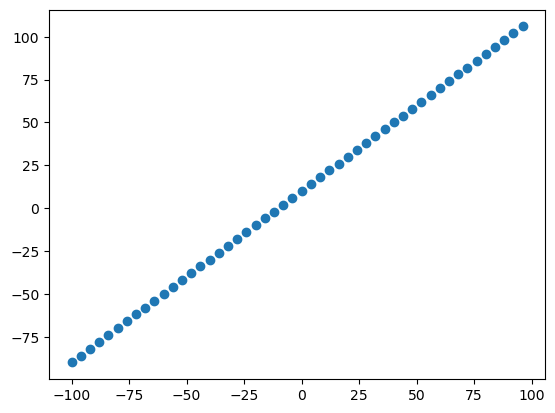

In [29]:
#Visualise the data
plt.scatter(X, y)

### Three sets of the data for the model

1. Training dataset
2. Validating dataset
3. Testing dataset

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.numpy(), y.numpy(), test_size= 0.20)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40,), (10,), (40,), (10,))

In [31]:
X_train = tf.constant(X_train)
X_test = tf.constant(X_test)
y_train = tf.constant(y_train)
y_test = tf.constant(y_test)

X_train, X_test, y_train, y_test

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([ -4,   0,  12, -16,  56, -60, -80, -44, -40,  -8,  84, -84,  96,
         16,   4,  36, -12,  76, -92, -20,  72,  68,  44,  32,  88,  80,
         24,  60, -76, -48, -24,  40, -32, -68, -96,  28,   8, -88, -36,
        -72], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=
 array([  20,   52,  -52,   92,  -56,   64,  -64, -100,   48,  -28],
       dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([  6,  10,  22,  -6,  66, -50, -70, -34, -30,   2,  94, -74, 106,
         26,  14,  46,  -2,  86, -82, -10,  82,  78,  54,  42,  98,  90,
         34,  70, -66, -38, -14,  50, -22, -58, -86,  38,  18, -78, -26,
        -62], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 30,  62, -42, 102, -46,  74, -54, -90,  58, -18], dtype=int32)>)

### Visualising the data

Now we have got out data in training and test sets ... Let's Visualise it

[]

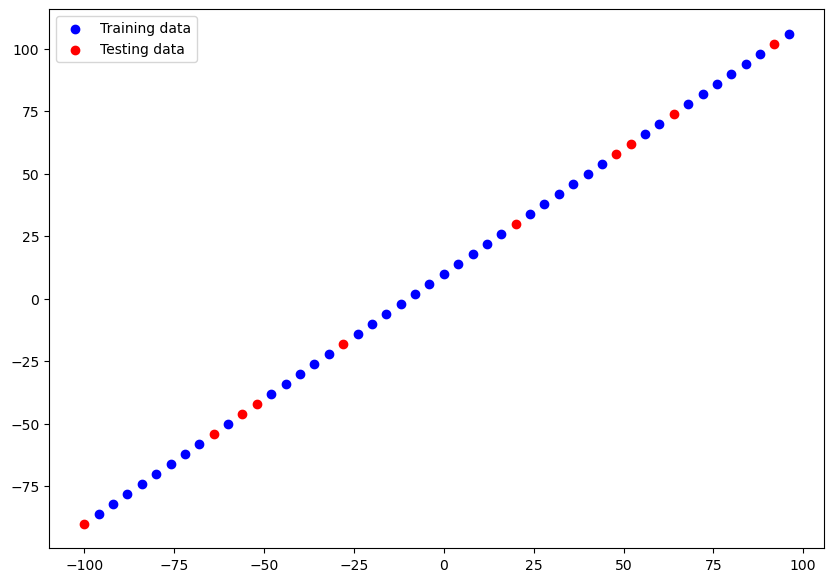

In [32]:
plt.figure(figsize= (10, 7))

plt.scatter(X_train, y_train, c= 'blue', label= 'Training data')
plt.scatter(X_test, y_test, c= 'red', label= 'Testing data')

plt.legend()

plt.plot()

In [33]:
# Let's build a model using the training and evaluate using the testing data

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD())

# model.fit(X_train, y_train, epochs= 100)

In [35]:
#Visualising the model

model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [36]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation= 'relu', input_shape= [1]),
    tf.keras.layers.Dense(50, activation= 'relu'),
    tf.keras.layers.Dense(100, activation= 'relu'),
    tf.keras.layers.Dense(1, name= "output_layer")
], name= 'Model_1')

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(learning_rate= 0.001),
              metrics= ['mae'])


In [37]:
model.summary()

Model: "Model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 10)                20        
                                                                 
 dense_15 (Dense)            (None, 50)                550       
                                                                 
 dense_16 (Dense)            (None, 100)               5100      
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 5,771
Trainable params: 5,771
Non-trainable params: 0
_________________________________________________________________


1. Total Params: total number of parameters in the model
2. Trainable parameters: parameters that can be updated while on training
3. Non-trainable params: parameters that are not updated while training, particularly seen in **transfer learning models**

**Excercies**: Try playing around with the number of hidden units in the dense layer, see how that effect the number of parameters

In [38]:
#Let's fit the model to the training data
model.fit(X_train, y_train, epochs= 150, verbose= 1)

Epoch 1/150


2/2 [==============================] - 0s 3ms/step - loss: 43.8180 - mae: 43.8180
Epoch 2/150
2/2 [==============================] - 0s 1ms/step - loss: 41.7231 - mae: 41.7231
Epoch 3/150
2/2 [==============================] - 0s 1ms/step - loss: 39.7145 - mae: 39.7145
Epoch 4/150
2/2 [==============================] - 0s 1ms/step - loss: 37.8340 - mae: 37.8340
Epoch 5/150
2/2 [==============================] - 0s 1ms/step - loss: 35.9132 - mae: 35.9132
Epoch 6/150
2/2 [==============================] - 0s 2ms/step - loss: 33.9858 - mae: 33.9858
Epoch 7/150
2/2 [==============================] - 0s 1ms/step - loss: 32.1328 - mae: 32.1328
Epoch 8/150
2/2 [==============================] - 0s 1ms/step - loss: 30.3504 - mae: 30.3504
Epoch 9/150
2/2 [==============================] - 0s 1ms/step - loss: 29.0824 - mae: 29.0824
Epoch 10/150
2/2 [==============================] - 0s 1ms/step - loss: 28.8728 - mae: 28.8728
Epoch 11/150
2/2 [==============================] - 0s 1ms/step - loss:

In [39]:
# Get a summary of our model
model.summary()

Model: "Model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 10)                20        
                                                                 
 dense_15 (Dense)            (None, 50)                550       
                                                                 
 dense_16 (Dense)            (None, 100)               5100      
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 5,771
Trainable params: 5,771
Non-trainable params: 0
_________________________________________________________________


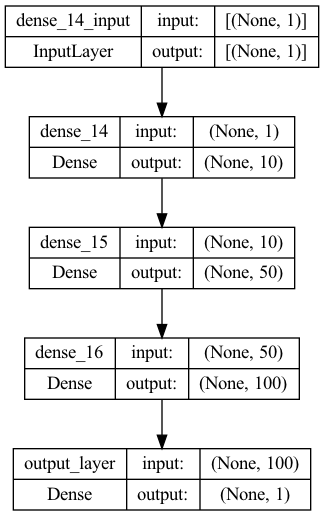

In [40]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes= True)

### Visualising our model ppredictions

To visualise prediction, it's a good idea to plot them against the ground truth labels.

Often you will see this in the form of `y_test` or `y_true` versus `y_pred`

In [41]:
#Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 28ms/step


array([[ 28.2596  ],
       [ 61.30831 ],
       [-41.3716  ],
       [102.619194],
       [-45.281002],
       [ 73.70158 ],
       [-53.0998  ],
       [-88.23708 ],
       [ 57.177227],
       [-17.645287]], dtype=float32)

In [42]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 30,  62, -42, 102, -46,  74, -54, -90,  58, -18], dtype=int32)>

**Note**: If you feel like you are going to reuse some kind of functionality in the future, it is a good idea to turn it into a function

In [43]:
# Let's create a plotting function
def plot_predictions(train_data= X_train, train_labels= y_train,
                     test_data= X_test, test_labels= y_test,
                     predictions= y_pred):
    """
    Plots training data, test data and compares prediction to ground truth labels
    """

    plt.figure(figsize=(10, 7))
    #Plot training data in blue
    plt.scatter(train_data, train_labels, c= 'b', label= "Training data")
    #PLotting testing data in green
    plt.scatter(test_data, test_labels, c= 'g', label= "Testing data")
    #plotting prediction data in red
    plt.scatter(test_data, predictions, c= 'r', label= 'Prediction data')
    plt.legend()
    plt.show()

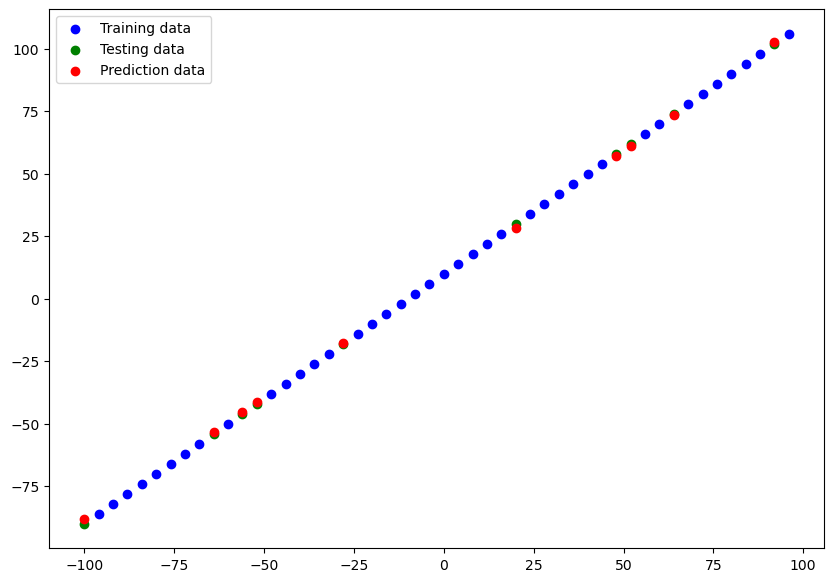

In [44]:
plot_predictions(train_data= X_train, train_labels= y_train,
                 test_data= X_test, test_labels= y_test,
                 predictions= y_pred)

### Evaluating our models predictions with regression evaluation metrics

Depending on the problem you are working on there will be different evaluation metric to evaluate your model's performance.

Since we are working on a regressionm, two of the main metrics:
1. MAE - Mean absolute error
2. MSE - Means square error

In [45]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 87ms/step - loss: 0.8538 - mae: 0.8538


[0.853772759437561, 0.853772759437561]

In [46]:
# Calculate the mae
loss_value = tf.keras.metrics.mean_absolute_error(y_test, 
                                                  tf.squeeze(tf.constant(y_pred)))
loss_value.numpy()

0.8537706

In [47]:
#Calculate the mse
mse_value = tf.keras.losses.MSE(y_test, tf.squeeze(tf.constant(y_pred)))

mse_value

<tf.Tensor: shape=(), dtype=float32, numpy=0.96127385>

In [48]:
#make some function to reuse mae and mse
def mae(y_true, y_pred):
    return tf.keras.losses.MAE(y_true, tf.squeeze(tf.constant(y_pred)))

def mse(y_true, y_pred):
    return tf.keras.losses.MSE(y_true, tf.squeeze(tf.constant(y_pred)))

### Running experiments to improve our model
```
Build -> fit -> evaluate -> tweak -> repeat
```

1. Get more data
2. Make your model larger
3. Train for longer

Let's perform 3 modelling experiments
1. `model_1`: same as the original, 1 layer, trained for 100 epochs
2. `model_2`: 2 layers, trained for 100 epochs
3. `model_3`: 2 layers, trained for 500 epochs
4. `model_4`: on your own
5. `model_5`

**Build `model_1`**

In [49]:
#set random seed
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
], name= 'model_1')

model_1.compile(loss= tf.keras.losses.mae,
                optimizer= tf.keras.optimizers.SGD(),
                metrics= ['mae'])

model_1.fit(tf.expand_dims(X_train, axis= -1), y_train, epochs= 100)


Epoch 1/100


2/2 [==============================] - 0s 4ms/step - loss: 19.1677 - mae: 19.1677
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 13.8759 - mae: 13.8759
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 15.1418 - mae: 15.1418
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 9.9932 - mae: 9.9932
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 9.9038 - mae: 9.9038
Epoch 6/100
2/2 [==============================] - 0s 1ms/step - loss: 9.7764 - mae: 9.7764
Epoch 7/100
2/2 [==============================] - 0s 1ms/step - loss: 11.0169 - mae: 11.0169
Epoch 8/100
2/2 [==============================] - 0s 1ms/step - loss: 9.7119 - mae: 9.7119
Epoch 9/100
2/2 [==============================] - 0s 1ms/step - loss: 10.8096 - mae: 10.8096
Epoch 10/100
2/2 [==============================] - 0s 1ms/step - loss: 12.8069 - mae: 12.8069
Epoch 11/100
2/2 [==============================] - 0s 1ms/step - loss: 9.9671 

In [50]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


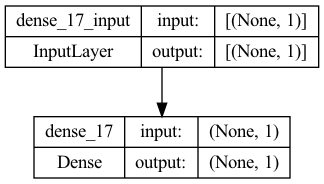

In [51]:
plot_model(model_1, show_shapes= True)

1/1 [==============================] - 0s 30ms/step


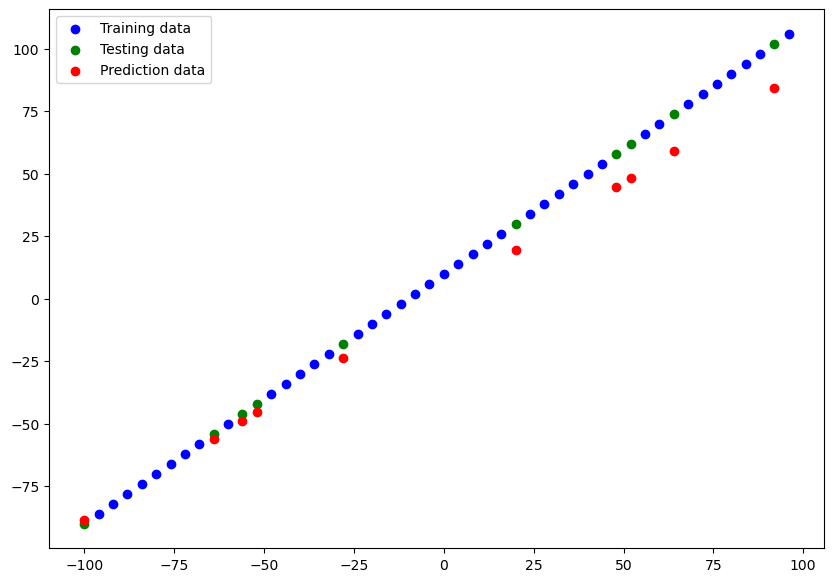

In [52]:
# make and plot prediction for model_1
y_pred_1 = model_1.predict(tf.expand_dims(X_test, axis= -1))
plot_predictions(train_data= X_train, train_labels= y_train,
                 test_data= X_test, test_labels= y_test,
                 predictions= y_pred_1)

In [53]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_pred_1)
mse_1 = mse(y_test, y_pred_1)

mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=8.57424>,
 <tf.Tensor: shape=(), dtype=float32, numpy=107.506996>)

**Build `model_2`**

* 2 dense layers, trained for 100 epochs

In [54]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss= tf.keras.losses.mae,
                optimizer= tf.keras.optimizers.SGD(),
                metrics= ['mse'])

model_2.fit(tf.expand_dims(X_train, axis= -1), y_train, epochs= 100)

Epoch 1/100
2/2 [==============================] - 0s 3ms/step - loss: 32.4777 - mse: 1484.9230
Epoch 2/100
2/2 [==============================] - 0s 1ms/step - loss: 40.4453 - mse: 2400.6707
Epoch 3/100
2/2 [==============================] - 0s 1ms/step - loss: 39.4406 - mse: 2243.1675
Epoch 4/100
2/2 [==============================] - 0s 1ms/step - loss: 21.9026 - mse: 713.8950
Epoch 5/100
2/2 [==============================] - 0s 1ms/step - loss: 9.8817 - mse: 103.0822
Epoch 6/100
2/2 [==============================] - 0s 1ms/step - loss: 13.7859 - mse: 335.2773
Epoch 7/100
2/2 [==============================] - 0s 1ms/step - loss: 23.2454 - mse: 797.9194
Epoch 8/100
2/2 [==============================] - 0s 1ms/step - loss: 9.8863 - mse: 98.4389
Epoch 9/100
2/2 [==============================] - 0s 1ms/step - loss: 10.1120 - mse: 115.9928
Epoch 10/100
2/2 [==============================] - 0s 1ms/step - loss: 21.6025 - mse: 672.1924
Epoch 11/100
2/2 [==============================]

1/1 [==============================] - 0s 22ms/step


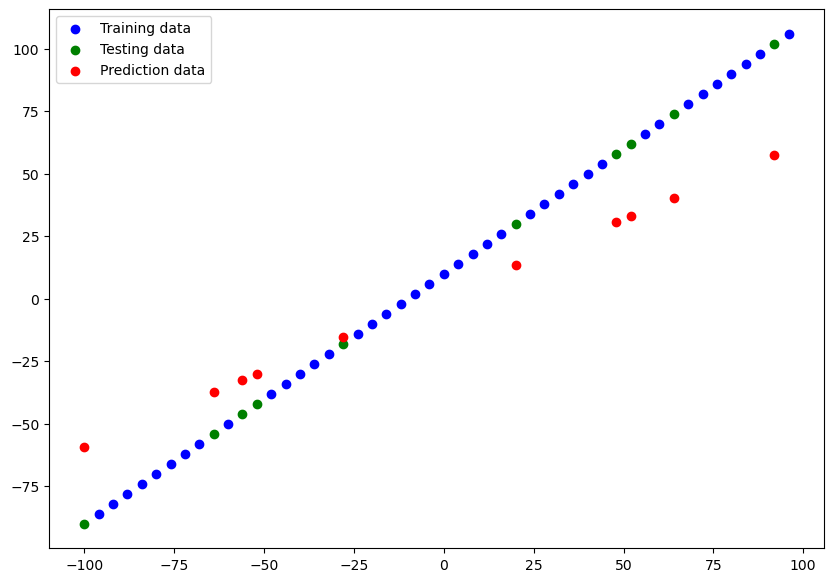

In [55]:
y_pred_2 = model_2.predict(X_test)

plot_predictions(predictions= y_pred_2)

In [56]:
mae_2 = mae(y_test, y_pred_2)
mse_2 = mse(y_test, y_pred_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=22.61997>,
 <tf.Tensor: shape=(), dtype=float32, numpy=652.1571>)

**Build `model_3`**

* 2 layers, 500 epochs

In [57]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss= tf.keras.losses.mae,
                optimizer= tf.keras.optimizers.SGD(),
                metrics= ['mae'])

model_3.fit(tf.expand_dims(X_train, axis= -1), y_train, epochs= 500)

Epoch 1/500
2/2 [==============================] - 0s 3ms/step - loss: 33.4518 - mae: 33.4518
Epoch 2/500
2/2 [==============================] - 0s 1ms/step - loss: 42.8576 - mae: 42.8576
Epoch 3/500
2/2 [==============================] - 0s 1ms/step - loss: 31.9103 - mae: 31.9103
Epoch 4/500
2/2 [==============================] - 0s 1ms/step - loss: 17.4812 - mae: 17.4812
Epoch 5/500
2/2 [==============================] - 0s 1ms/step - loss: 9.9711 - mae: 9.9711
Epoch 6/500
2/2 [==============================] - 0s 1ms/step - loss: 9.9455 - mae: 9.9455
Epoch 7/500
2/2 [==============================] - 0s 1ms/step - loss: 13.5623 - mae: 13.5623
Epoch 8/500
2/2 [==============================] - 0s 1ms/step - loss: 25.1654 - mae: 25.1654
Epoch 9/500
2/2 [==============================] - 0s 1ms/step - loss: 10.0568 - mae: 10.0568
Epoch 10/500
2/2 [==============================] - 0s 1ms/step - loss: 21.8619 - mae: 21.8619
Epoch 11/500
2/2 [==============================] - 0s 1ms/step

1/1 [==============================] - 0s 24ms/step


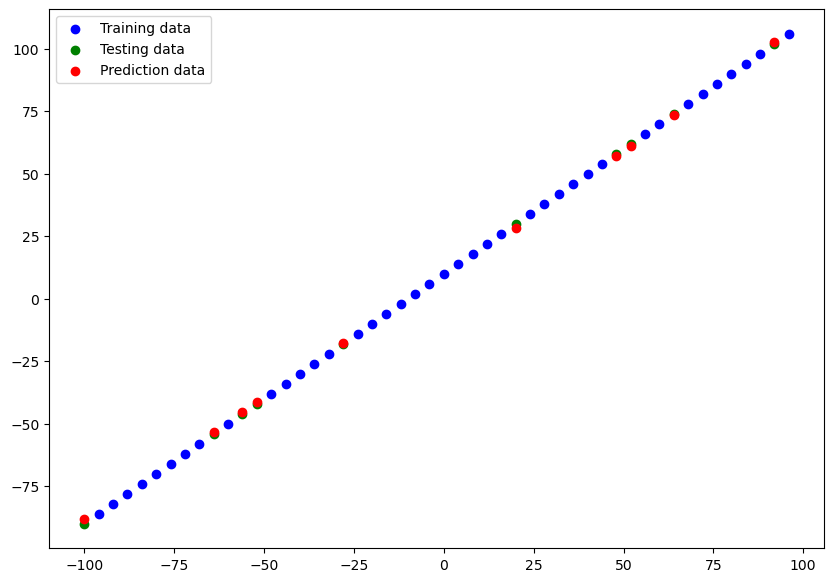

In [58]:
y_pred_3 = model_3.predict(X_test)
plot_predictions(predictions= y_pred)

In [59]:
mae_3 = mae(y_test, y_pred)
mse_3 = mse(y_test, y_pred)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=0.8537706>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.96127385>)

**Note**: You want to start with small experiments (small models) and make sure they work and then increase their scale when necessary

### Comparing the results of our experiments

We have run a few experiments, let's compare the results

In [61]:
# Let's compare the model's result using pandas
model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns= ["model", "mae", "mse"])

all_results

,model,mae,mse
0,model_1,8.574240,107.506996
1,model_2,22.619970,652.157104
2,model_3,0.853771,0.961274


Looks like `model_3` performed the best

In [62]:
model_3.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 10)                20        
                                                                 
 dense_21 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


**Note**: One of the main goal should be to minimize the time between your experiments. The more expermients you do, the more things you'll figure what wiil not work and reach more and more closer to the optimal model

## Tracking your experiments

One really good habit is to track your experiments.

And when doing so, it can be tedious if you are running lots of experiments.

Luckily, there are tools to help us:
**Resource**:

* Tensorboard
* Weights and Biases


### Saving Model

Saving our models allows us to use them outside of the editor we have code the model such as in a web application or a mobile app.

There are two major formats we can save our model's:
1. SavedModel Format
2. HDF5 format

In [64]:
model_3.save("best_model_SavedModel_format")

INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


In [65]:
model_3.save("best_model_HDF5_format.h5")

## Loading a saved model

In [76]:
SavedModel_format_model = tf.keras.models.load_model("best_model_SavedModel_format")
HDF5_format_model = tf.keras.models.load_model("best_model_HDF5_format.h5")

In [78]:
#Comparing the model architecture
SavedModel_format_model.summary(), HDF5_format_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 10)                20        
                                                                 
 dense_21 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 10)                20        
                                                                 
 dense_21 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params:

(None, None)

In [69]:
model_3.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 10)                20        
                                                                 
 dense_21 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [70]:
# Compare model_2 predictions with SavedModel and HDF5 format predictions
model_3_predictions = model_3.predict(X_test)
SavedModel_predictions = SavedModel_format_model.predict(X_test)
HDF5_predictions = HDF5_format_model.predict(X_test)

1/1 [==============================] - 0s 20ms/step


In [71]:
model_3_predictions == SavedModel_predictions

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [72]:
model_3_predictions == HDF5_predictions

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [79]:
#Comparinmg model MAE values
mae(y_test, model_3_predictions) == mae(y_test, SavedModel_predictions), mae(y_test, model_3_predictions) == mae(y_test, HDF5_predictions)

(<tf.Tensor: shape=(), dtype=bool, numpy=True>,
 <tf.Tensor: shape=(), dtype=bool, numpy=True>)

### A Larger Example

In [81]:
# import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [82]:
insurances = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurances

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
